In [1]:
import pandas as pd
import numpy as np

In [2]:
df_x = pd.read_csv("./../Data/linearX.csv", header=None)
df_y = pd.read_csv("./../Data/linearY.csv", header=None)

In [3]:
x_data_raw = np.array(df_x[0].to_list())
y_data = np.array(df_y[0].to_list())

In [4]:
# Normalise x_data_raw
x_data_original = (x_data_raw - np.mean(x_data_raw))/np.std(x_data_raw)

In [5]:
x_data = np.column_stack((x_data_original, np.ones(len(x_data_original))))

In [6]:

def perform_linear_regression(threshold = 1e-8, eta=0.01):
    J_theta_old = 0
    J_theta_new = 1e5
    
    animation_data = []
    theta_initial = np.zeros(2)
    while abs(J_theta_new-J_theta_old) > threshold:
        
        J_theta = 0
        m = len(x_data)
        for x,y in zip(x_data,y_data):
            J_theta += (y - np.sum(x * theta_initial))**2
        J_theta = J_theta/(2*m)
        
        J_theta_old = J_theta_new
        J_theta_new = J_theta   

        animation_data.append((J_theta, theta_initial[0],theta_initial[1]))

        theta_initial = theta_initial - eta * (1/m) * np.dot((np.dot(x_data, theta_initial) - y_data) , x_data)
        print(f"J_theta: {J_theta}, Difference: {abs(J_theta_new-J_theta_old)}, Parameters:{theta_initial}")
    
    return theta_initial, animation_data
    
theta_initial,animation_data = perform_linear_regression()

J_theta: 0.49662790471450036, Difference: 99999.50337209529, Parameters:[1.34019602e-05 9.96620100e-03]
J_theta: 0.48674503318699885, Difference: 0.009882871527501502, Parameters:[2.66699008e-05 1.98327400e-02]
J_theta: 0.47705883080289474, Difference: 0.009686202384104114, Parameters:[3.98051619e-05 2.96006136e-02]
J_theta: 0.4675653838462344, Difference: 0.009493446956660323, Parameters:[5.28090705e-05 3.92708085e-02]
J_theta: 0.45826085648401155, Difference: 0.00930452736222287, Parameters:[6.56829400e-05 4.88443014e-02]
J_theta: 0.4491414892162969, Difference: 0.009119367267714673, Parameters:[7.84280708e-05 5.83220594e-02]
J_theta: 0.4402035973572099, Difference: 0.008937891859087, Parameters:[9.10457503e-05 6.77050398e-02]
J_theta: 0.4314435695461187, Difference: 0.008760027811091198, Parameters:[0.00010354 0.07699419]
J_theta: 0.4228578662884679, Difference: 0.00858570325765079, Parameters:[0.0001159  0.08619045]
J_theta: 0.41444301852564464, Difference: 0.008414847762823252, Pa

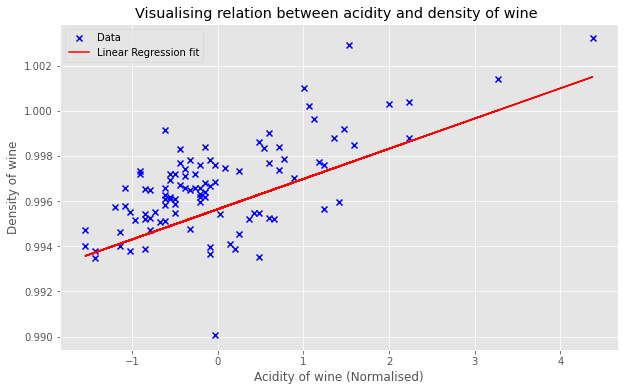

In [7]:
#Plot this data and linear regression output
import matplotlib.pyplot as plt

plt.style.use('ggplot')


plt.figure(figsize=(10, 6))
plt.scatter(x_data_original, y_data, label='Data', color='blue', marker='x')
regression = x_data_original * theta_initial[0] + theta_initial[1]
plt.plot(x_data_original, regression, label='Linear Regression fit', color='red')

plt.xlabel("Acidity of wine (Normalised)")
plt.ylabel("Density of wine")
plt.title("Visualising relation between acidity and density of wine ") 
plt.legend()
plt.savefig('Plots/linear_visualised.png', dpi=300, bbox_inches='tight')
plt.show()



In [8]:
theta_0 = np.linspace(-2, 2, 200)  
theta_1 = np.linspace(-2, 2, 200)  
def get_mesh():
    X, Y = np.meshgrid(theta_0, theta_1)
    Z = np.zeros((len(theta_0),len(theta_1)))

    m = len(x_data)
    for i,t0 in enumerate(theta_0):
        for j,t1 in enumerate(theta_1):
            theta_temp = [t0, t1]
            for x, y in zip(x_data, y_data):
                Z[j, i] += (y - np.sum(x * theta_temp)) ** 2
            Z[j, i] = Z[j, i] / (2 * m)

    return X, Y, Z

X, Y, Z = get_mesh()

In [9]:

import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=Z, x=theta_0, y=theta_1)])
fig.update_layout(
    title='3-dimensional mesh showing the error function (J(θ))',
    scene=dict(xaxis_title='Theta X', yaxis_title='Theta Y', zaxis_title='J(theta)')
)

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

fig.update_layout(
    scene=dict(
        aspectratio = dict( x=1, y=1, z=0.5 ),
        aspectmode = 'manual'
    ),
)

fig.write_html('Plotly/3d_cost_function_plot.html')


In [10]:
animation_data_subset = animation_data[0::20]

In [11]:
surface_plot = go.Surface(z=Z, x=theta_0, y=theta_1, name="Cost Function",
                          hidesurface=False                 
                        )



sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Loss:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

x_visible_range = [-2, 2]
y_visible_range = [-2, 2]
z_visible_range = [0, 6]

scatter_frames = []
x_frame = []
y_frame = []
z_frame = []
for z,x,y in animation_data_subset:
    x_frame.append(x)
    y_frame.append(y)
    z_frame.append(z) 

    # scatter_frame = go.Figure()
    # scatter_frame.add_trace(surface_plot)
    # scatter_frame.add_trace(go.Scatter3d(x=x_frame, y=y_frame, z=z_frame, mode='markers', marker=dict(size=10, color='blue')))
    
    scatter_frame = go.Frame(data=[go.Scatter3d(x=x_frame, y=y_frame, z=z_frame, mode='markers', marker=dict(size=10, color='green'), name="Gradient Descent")]
                             ,name=str(z))
    # scatter_frame.update_layout(scene=dict(xaxis_range=x_visible_range, yaxis_range=y_visible_range, zaxis_range=z_visible_range))
    scatter_frame.update(
        layout={
                "xaxis": {"range": x_visible_range},
                "yaxis": {"range": y_visible_range},
            }
    )

    scatter_frames.append(scatter_frame)


    slider_step = {"args": [
        [z],
        {"frame": {"duration": 300, "redraw": True},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
        "label": z,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)








animation_fig = go.Figure(data=[surface_plot,surface_plot],
                        layout=go.Layout(
                            xaxis=dict(range=[-2, 2], autorange=False, zeroline=False),
                            yaxis=dict(range=[-2, 2], autorange=False, zeroline=False),
                            title_text="3D Scatter Plot Animation with Surface", hovermode="closest",
                            updatemenus=[
                                    {
                                        "buttons": [
                                            {
                                                "args": [None, {"frame": {"duration": 500, "redraw": True},
                                                                "fromcurrent": True, "transition": {"duration": 300,
                                                                                                    "easing": "quadratic-in-out"}}],
                                                "label": "Play",
                                                "method": "animate"
                                            },
                                            {
                                                "args": [[None], {"frame": {"duration": 0, "redraw": True},
                                                                "mode": "immediate",
                                                                "transition": {"duration": 0}}],
                                                "label": "Pause",
                                                "method": "animate"
                                            }
                                        ],
                                        "direction": "left",
                                        "pad": {"r": 10, "t": 87},
                                        "showactive": False,
                                        "type": "buttons",
                                        "x": 0.1,
                                        "xanchor": "right",
                                        "y": 0,
                                        "yanchor": "top"
                                    }
                                ],

                                sliders=[sliders_dict],
                                showlegend = True
                            ),
                              
                              
                          frames=scatter_frames)

animation_fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),
    title='3D Scatter Plot Animation with Surface',
)

animation_fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))


animation_fig.update_layout(
    scene=dict(
        aspectratio = dict( x=1, y=1, z=0.5 ),
        aspectmode = 'manual'
    ),
)

# animation_fig.show()
animation_fig.write_html('Plotly/3d_cost_function_animation_plot.html')


In [12]:
animation_fig.show()

In [13]:
surface_plot = go.Contour(z=Z, x=theta_0, y=theta_1, name="Cost Function")



sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Loss:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

x_visible_range = [-2, 2]
y_visible_range = [-2, 2]
z_visible_range = [0, 6]

scatter_frames = []
x_frame = []
y_frame = []
z_frame = []
for z,x,y in animation_data_subset:
    x_frame.append(x)
    y_frame.append(y)
    z_frame.append(z) 

    # scatter_frame = go.Figure()
    # scatter_frame.add_trace(surface_plot)
    # scatter_frame.add_trace(go.Scatter3d(x=x_frame, y=y_frame, z=z_frame, mode='markers', marker=dict(size=10, color='blue')))
    
    scatter_frame = go.Frame(data=[go.Contour(z=Z, x=theta_0, y=theta_1, name="Cost Function"),go.Scatter(x=x_frame, y=y_frame, mode='markers', marker=dict(size=10, color='green'), name="Gradient Descent"),
                                   ]
                             ,name=str(z))
    # scatter_frame.update_layout(scene=dict(xaxis_range=x_visible_range, yaxis_range=y_visible_range, zaxis_range=z_visible_range))
    scatter_frame.update(
        layout={
                "xaxis": {"range": x_visible_range},
                "yaxis": {"range": y_visible_range},
            }
    )

    scatter_frames.append(scatter_frame)


    slider_step = {"args": [
        [z],
        {"frame": {"duration": 300, "redraw": True},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
        "label": z,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)








animation_fig = go.Figure(data=[surface_plot,surface_plot],
                        layout=go.Layout(
                            xaxis=dict(range=[-2, 2], autorange=False, zeroline=False),
                            yaxis=dict(range=[-2, 2], autorange=False, zeroline=False),
                            title_text="Contour Plot Animation with Surface", hovermode="closest",
                            updatemenus=[
                                    {
                                        "buttons": [
                                            {
                                                "args": [None, {"frame": {"duration": 500, "redraw": True},
                                                                "fromcurrent": True, "transition": {"duration": 300,
                                                                                                    "easing": "quadratic-in-out"}}],
                                                "label": "Play",
                                                "method": "animate"
                                            },
                                            {
                                                "args": [[None], {"frame": {"duration": 0, "redraw": True},
                                                                "mode": "immediate",
                                                                "transition": {"duration": 0}}],
                                                "label": "Pause",
                                                "method": "animate"
                                            }
                                        ],
                                        "direction": "left",
                                        "pad": {"r": 10, "t": 87},
                                        "showactive": False,
                                        "type": "buttons",
                                        "x": 0.1,
                                        "xanchor": "right",
                                        "y": 0,
                                        "yanchor": "top"
                                    }
                                ],

                                sliders=[sliders_dict],
                                showlegend = True
                            ),
                              
                              
                          frames=scatter_frames)

animation_fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),
    title='3D Scatter Plot Animation with Surface',
)

# animation_fig.update_traces(contours_z=dict(show=True, usecolormap=True,
#                                   highlightcolor="limegreen", project_z=True))

# animation_fig.show()
animation_fig.write_html('Plotly/contour_animation.html')

MovieWriter imagemagick unavailable; using Pillow instead.


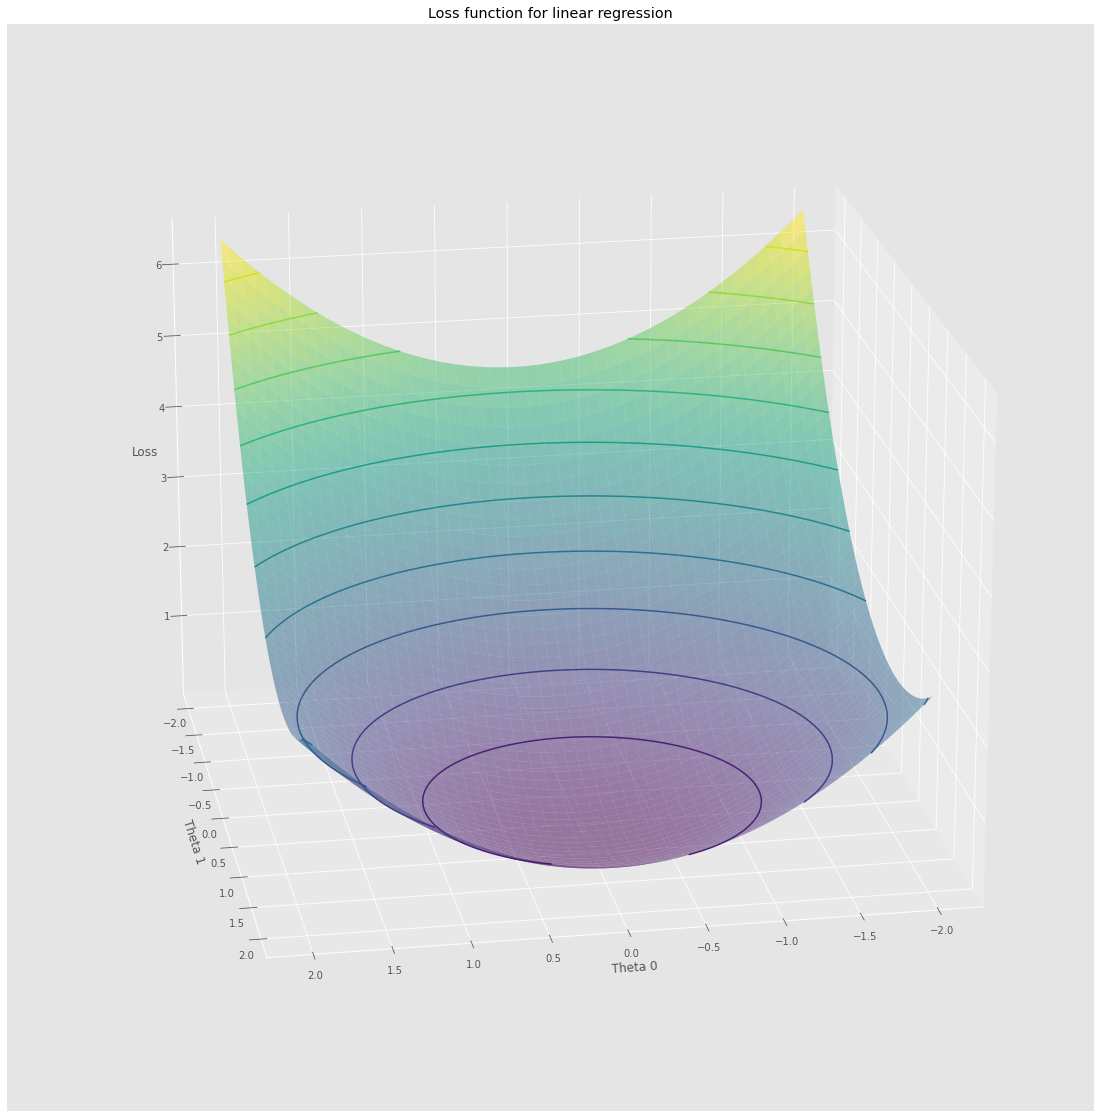

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib import cm




fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')


ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis', edgecolor='none',label='Loss function')
ax.contour3D(X, Y, Z, 10, cmap=cm.viridis)

ax.view_init(elev=20., azim=110)

frame = ax.scatter([], [], [], marker="o", c="black",alpha=1,s=17,label='Gradient descent')

def update(i):
    ax.view_init(elev=20., azim=80 + i/5)
    x_frame = []
    y_frame = []
    z_frame = []
    for z,x,y in animation_data_subset[:i]:
        x_frame.append(x)
        y_frame.append(y)
        z_frame.append(z) 
    frame._offsets3d = (x_frame, y_frame, z_frame)
    return frame

plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
ax.set_zlabel('Loss')
plt.title('Loss function for linear regression')
# plt.legend(loc="upper left")

gif = FuncAnimation(fig, update, frames=100, interval=200)
gif.save('Animation/3d_lost_plot.gif', dpi=90, writer='imagemagick')

# plt.legend()

plt.savefig("Plots/3d_plot_and_cost.png",dpi=500)

plt.show()


J_theta: 0.49662790471450036, Difference: 99999.50337209529, Parameters:[1.34019602e-06 9.96620100e-04]
J_theta: 0.4956351479213608, Difference: 0.0009927567931395376, Parameters:[2.67905184e-06 1.99224358e-03]
J_theta: 0.4946443756490506, Difference: 0.000990772272310203, Parameters:[4.01656881e-06 2.98687144e-03]
J_theta: 0.493655583930513, Difference: 0.0009887917185376072, Parameters:[5.35274826e-06 3.98050466e-03]
J_theta: 0.4926687688066207, Difference: 0.000986815123892315, Parameters:[6.68759153e-06 4.97314426e-03]
J_theta: 0.491683926326161, Difference: 0.0009848424804597133, Parameters:[8.02109995e-06 5.96479122e-03]
J_theta: 0.4907010525458199, Difference: 0.0009828737803410648, Parameters:[9.35327487e-06 6.95544652e-03]
J_theta: 0.48972014353016585, Difference: 0.0009809090156540634, Parameters:[1.06841176e-05 7.94511118e-03]
J_theta: 0.4887411953516338, Difference: 0.0009789481785320575, Parameters:[1.20136295e-05 8.93378617e-03]
J_theta: 0.4877642040905108, Difference: 0.

MovieWriter imagemagick unavailable; using Pillow instead.


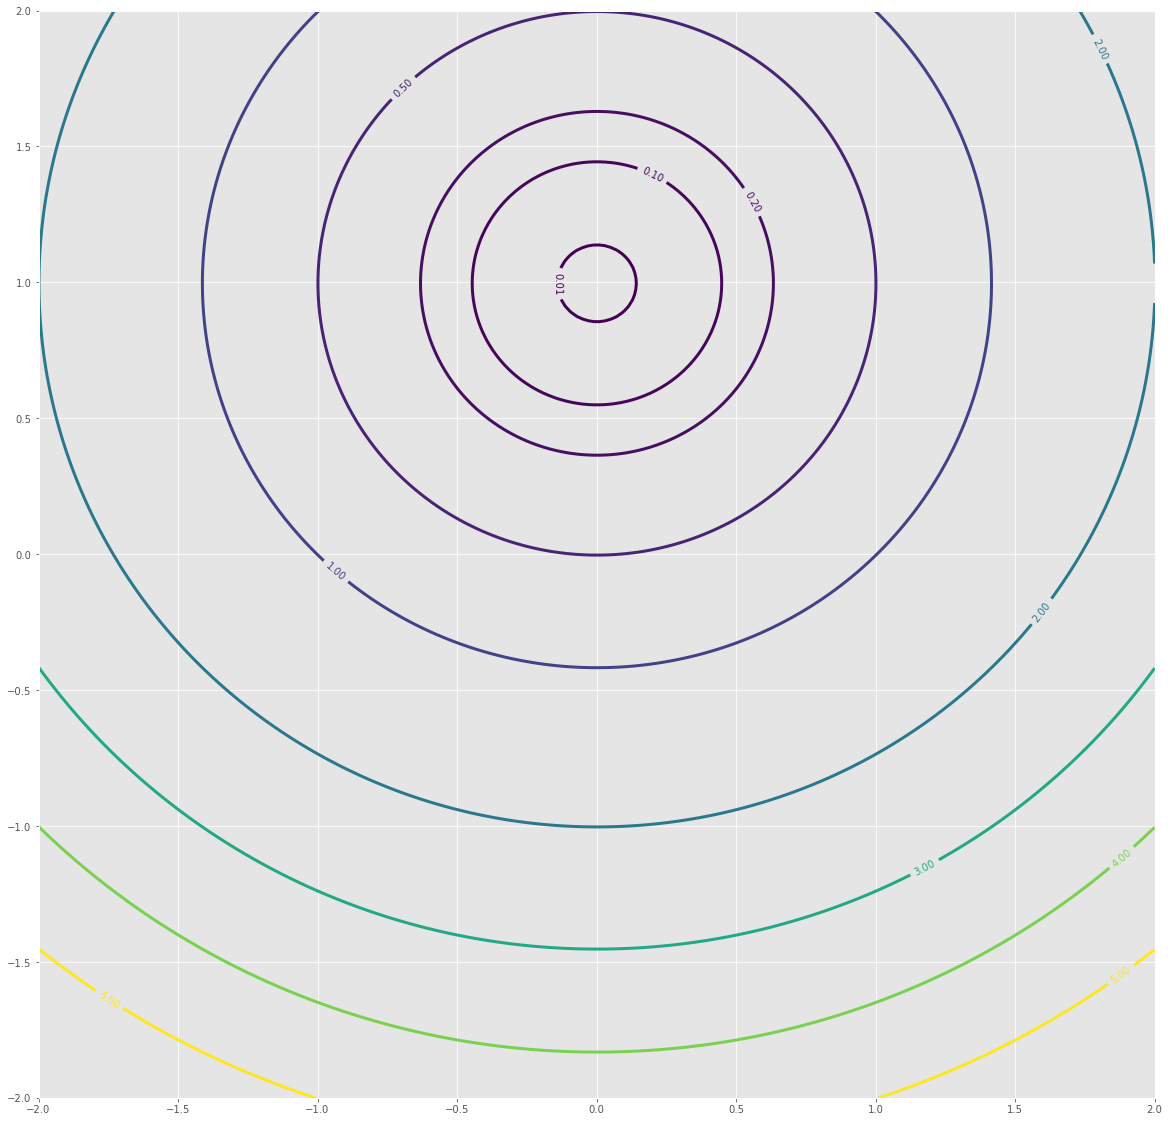

MovieWriter imagemagick unavailable; using Pillow instead.


J_theta: 0.49662790471450036, Difference: 99999.50337209529, Parameters:[3.35049005e-05 2.49155025e-02]
J_theta: 0.47210696091196847, Difference: 0.02452094380253189, Parameters:[6.61721784e-05 4.92081174e-02]
J_theta: 0.4487967387096867, Difference: 0.02331022220228174, Parameters:[9.80227744e-05 7.28934170e-02]
J_theta: 0.42663745872864317, Difference: 0.022159279981043556, Parameters:[0.00012908 0.09598658]
J_theta: 0.4055722931966633, Difference: 0.021065165531979846, Parameters:[0.00015936 0.11850242]
J_theta: 0.3855472202128247, Difference: 0.0200250729838386, Parameters:[0.00018888 0.14045536]
J_theta: 0.36651088520756375, Difference: 0.019036335005260974, Parameters:[0.00021766 0.16185948]
J_theta: 0.34841446924318703, Difference: 0.018096415964376722, Parameters:[0.00024572 0.1827285 ]
J_theta: 0.33121156381705164, Difference: 0.017202905426135395, Parameters:[0.00027308 0.20307579]
J_theta: 0.31485805184633164, Difference: 0.01635351197071999, Parameters:[0.00029976 0.2229144

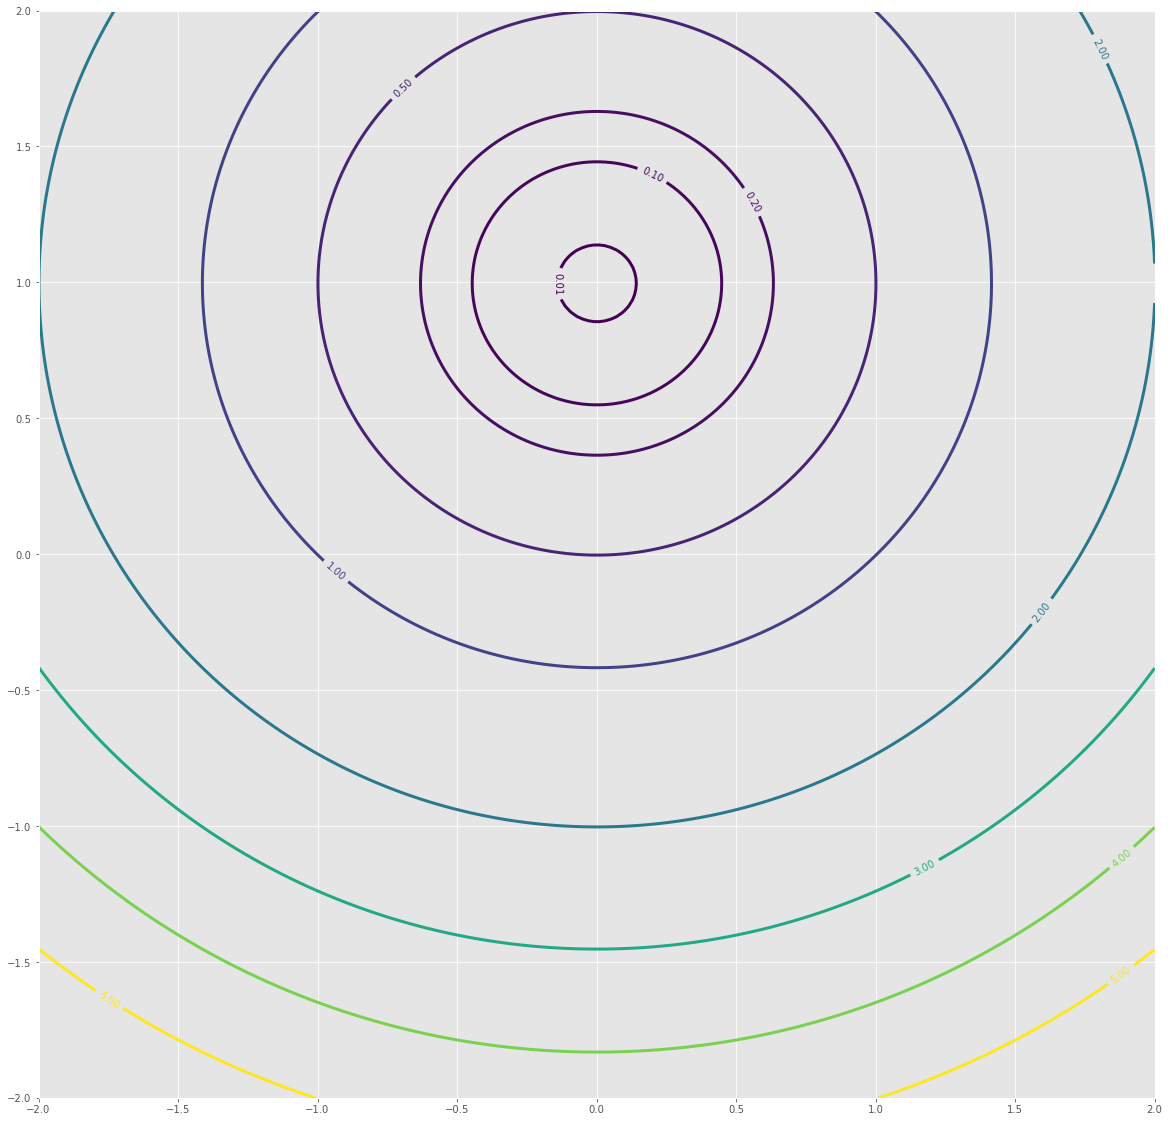

MovieWriter imagemagick unavailable; using Pillow instead.


J_theta: 0.49662790471450036, Difference: 99999.50337209529, Parameters:[0.00013402 0.09966201]
J_theta: 0.4022688298288092, Difference: 0.09435907488569117, Parameters:[0.00025464 0.18935782]
J_theta: 0.32583797917139945, Difference: 0.07643085065740973, Parameters:[0.00036319 0.27008405]
J_theta: 0.2639289901388975, Difference: 0.06190898903250197, Parameters:[0.00046089 0.34273765]
J_theta: 0.21378270902257113, Difference: 0.05014628111632635, Parameters:[0.00054882 0.4081259 ]
J_theta: 0.17316422131834674, Difference: 0.04061848770422438, Parameters:[0.00062796 0.46697532]
J_theta: 0.1402632462779249, Difference: 0.03290097504042183, Parameters:[0.00069918 0.5199398 ]
J_theta: 0.11361345649518326, Difference: 0.026649789782741656, Parameters:[0.00076329 0.56760783]
J_theta: 0.09202712677116258, Difference: 0.021586329724020678, Parameters:[0.00082098 0.61050905]
J_theta: 0.07454219969470575, Difference: 0.017484927076456824, Parameters:[0.0008729  0.64912016]
J_theta: 0.06037940876

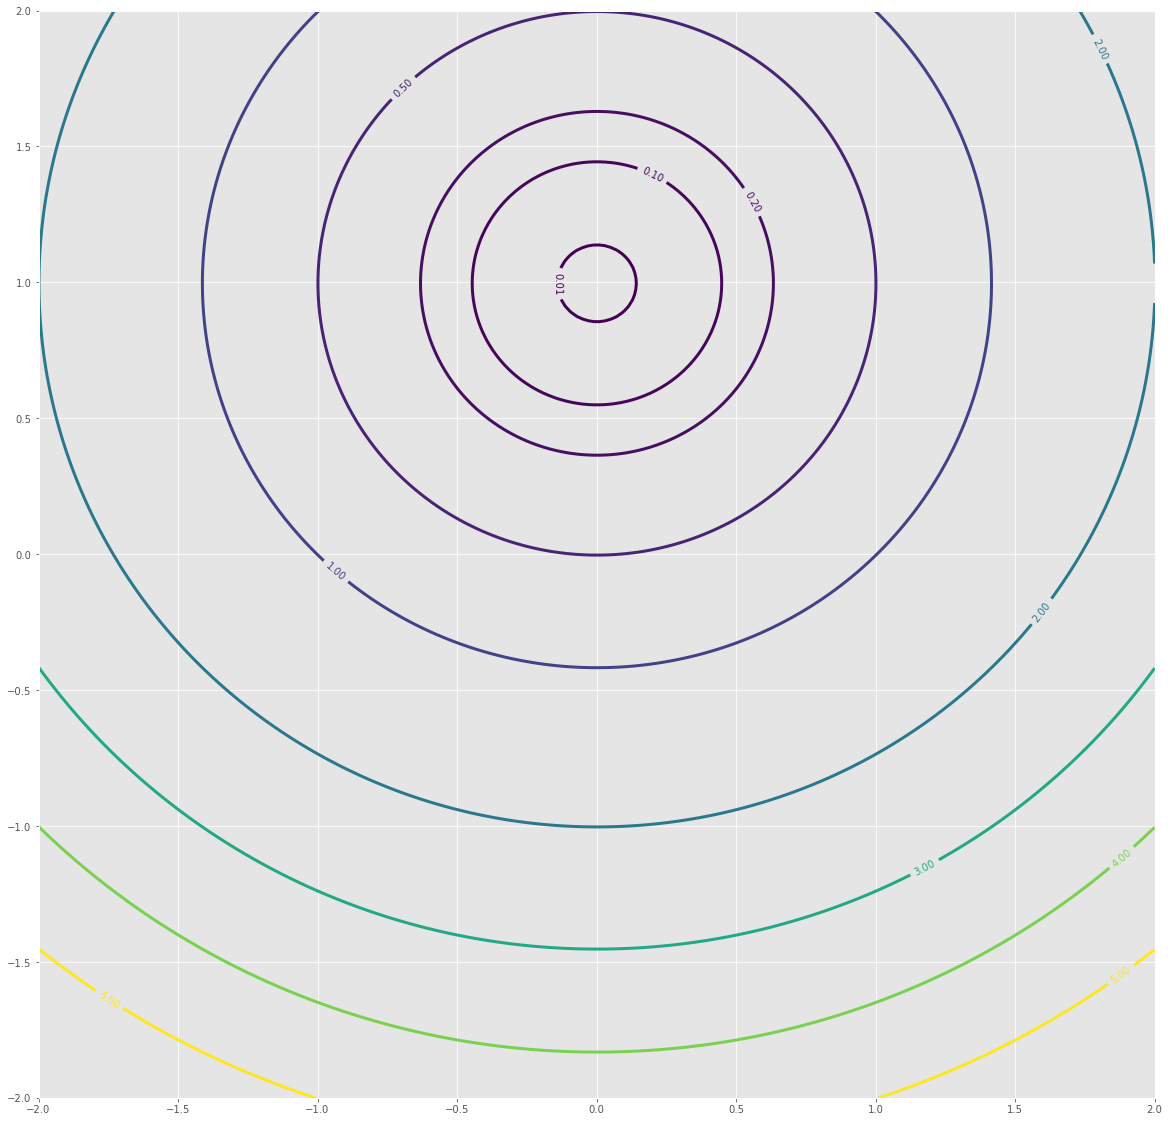

MovieWriter imagemagick unavailable; using Pillow instead.


J_theta: 0.49662790471450036, Difference: 99999.50337209529, Parameters:[0.00201029 1.49493015]
J_theta: 0.12415787227098328, Difference: 0.37247003244351706, Parameters:[0.00100515 0.74746507]
J_theta: 0.031040364160104077, Difference: 0.09311750811087921, Parameters:[0.00150772 1.12119761]
J_theta: 0.007760987132384255, Difference: 0.023279377027719823, Parameters:[0.00125643 0.93433134]
J_theta: 0.0019411428754542972, Difference: 0.005819844256929958, Parameters:[0.00138208 1.02776448]
J_theta: 0.00048618181122181116, Difference: 0.0014549610642324861, Parameters:[0.00131926 0.98104791]
J_theta: 0.00012244154516369103, Difference: 0.0003637402660581201, Parameters:[0.00135067 1.00440619]
J_theta: 3.150647864915983e-05, Difference: 9.093506651453121e-05, Parameters:[0.00133496 0.99272705]
J_theta: 8.772712020527834e-06, Difference: 2.2733766628631996e-05, Parameters:[0.00134281 0.99856662]
J_theta: 3.0892703633696075e-06, Difference: 5.683441657158227e-06, Parameters:[0.00133889 0.99

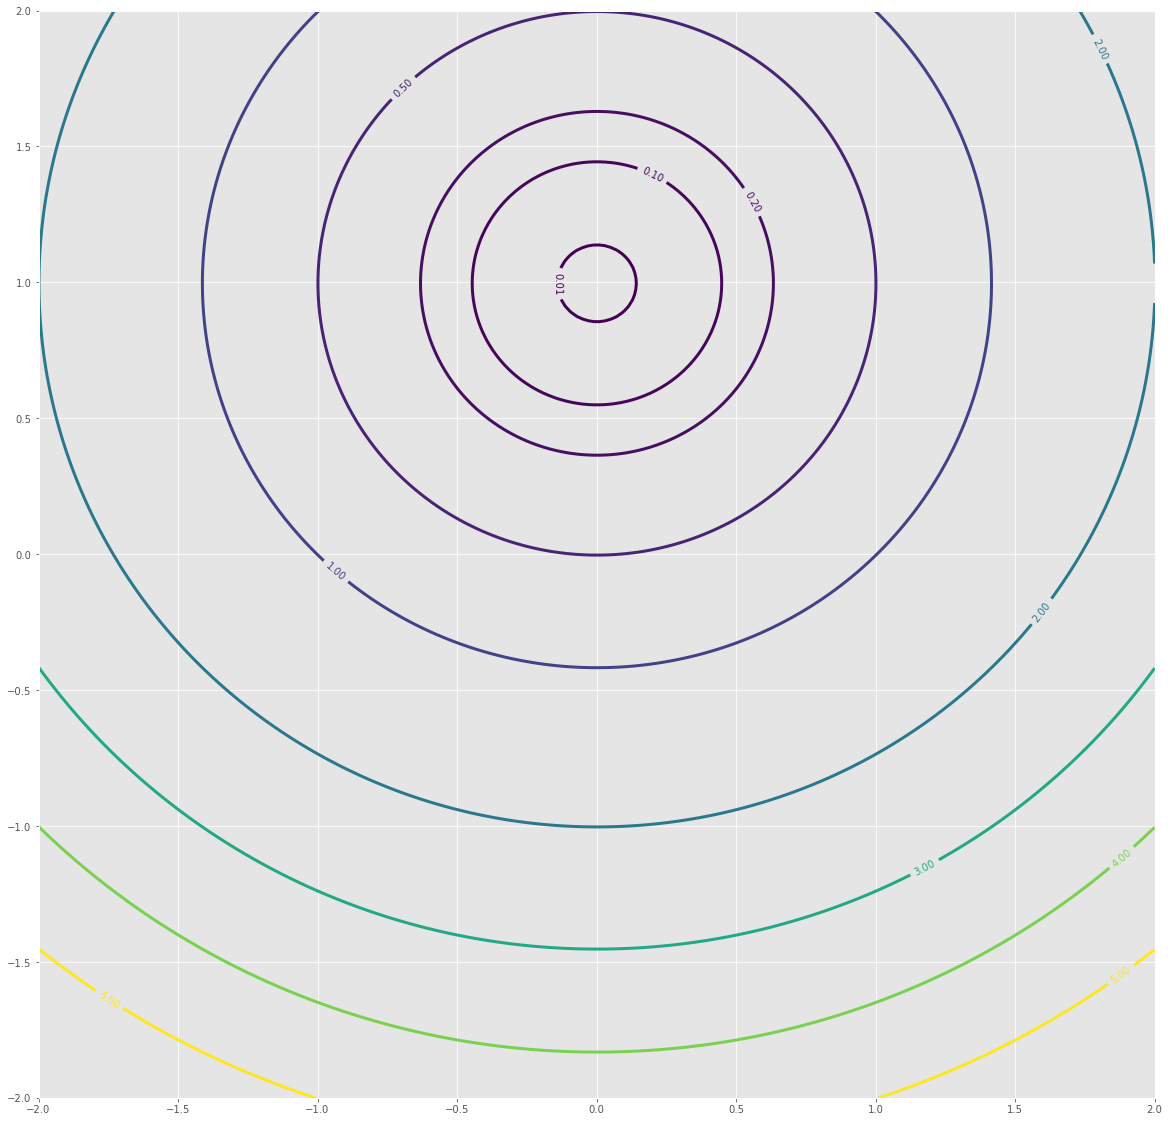

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib import cm


total_frames = 100

for neta in [0.001, 0.025, 0.1, 1.5]:
    theta_initial,animation_data_subset = perform_linear_regression(eta=neta,threshold=1e-5)
    
    # if len(animation_data_subset) > 100:
        # animation_data_subset = animation_data_subset[0::(len(animation_data_subset)//100)]
    
    fig,ax = plt.subplots(figsize=(20, 20))
    CS = ax.contour(X, Y, Z, extend='both',linewidths=3,levels=[0.01,0.1,0.2,0.5,1,2,3,4,5])
    ax.clabel(CS, inline=True, fontsize=10)

    frame = ax.scatter([], [], marker="o", c="black",alpha=1,s=17,label='Gradient descent')

    def update(i):
        ax.clear()
        CS = ax.contour(X, Y, Z, extend='both',linewidths=3,levels=[0.01,0.1,0.2,0.5,1,2,3,4,5])
        ax.clabel(CS, inline=True, fontsize=10)



        x_frame = []
        y_frame = []
        z_frame = []
        
        subs = i* len(animation_data_subset)//total_frames
        for z,x,y in animation_data_subset[:subs]:
            x_frame.append(x)
            y_frame.append(y)
            z_frame.append(z) 

        frame = ax.scatter(x_frame, y_frame, marker="o", c="black",alpha=1,s=17,label='Gradient descent')
        return frame

    plt.xlabel('Theta 0')
    plt.ylabel('Theta 1')
    plt.title(f'Loss function for linear regression with eta={neta}')
    
    ax.set_xlabel("Theta 0")
    ax.set_ylabel("Theta 1")
    ax.set_title(f'Loss function for linear regression with eta={neta}')
    
    #make the plot tight and remove margin


    gif = FuncAnimation(fig, update, frames=100, interval=200, repeat_delay=3000)
    gif.save(f'Animation/contour_graph_{neta}.gif', dpi=90, writer='imagemagick')


    plt.savefig(f"Plots/plot_contour_{neta}.png",dpi=500, bbox_inches='tight')

    plt.show()
